In [1]:
#Parkison's Disease Detection Dataset
"""
Created by  Max Little, Oxford University 
in collaboration with National centre for voice and speech,  Denver, Colorado

Date Donated: 2008-06-26

Citation: 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)
"""

#Data Set Characteristics
"""
Number of Instances: 197
Number of Attributes: 23
Attribute Characteristics: Real
Missing Values: None
"""

#Attribute Information:
"""
Matrix column entries (attributes):
Name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 
"""

"""
MDVP: Multidimensional Voice Program is a software that calculates 33 measures to analyze the fidelity of human voice
http://www.scielo.br/scielo.php?pid=S1516-18462015000401341&script=sci_arttext&tlng=en
"""

"""
Definition of key metrics:

Jitter: Random variation of phase causing uncertainity in signal frequency
- RAP: Relative average perturbation, avg difference between a period and the average of it and its two neighbors      
- PPQ: Period perturbation quotient, avg difference between a period and the average of it and 5 of its neighbors
- DDP: Average absolute difference of differences between jitter cycles

Shimmer: Variability of peak-peak amplitude in dB
- APQ3: 3-point amplitude perturbation quotient, 
- APQ5: 5-point amplitude perturbation quotient
- DDA: Average absolute difference between amplitudes of different period

NHR: Noise to harmonics ratio
HNR: Harmonics to Noise ratio

RPDE: Recurrence priod density entropy  measure
D2: Correlation dimension

PPE: Pitch Period Entropy

https://www.cs.upc.edu/~nlp/papers/far_jit_07.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

"""

#Data Set Information & Classification Task
"""
This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.
"""

'\nThis dataset is composed of a range of biomedical voice measurements from \n31 people, 23 with Parkinson\'s disease (PD). Each column in the table is a \nparticular voice measure, and each row corresponds one of 195 voice \nrecording from these individuals ("name" column). The main aim of the data \nis to discriminate healthy people from those with PD, according to "status" \ncolumn which is set to 0 for healthy and 1 for PD.\n'

# Homework goals:

### Goal 1. Explore if SMOTE &/or ADASYN can give better Classification results

### Goal 2. Try out Crossvalidation approach for data testing

###  Sol 1: Review different minority  oversampling and optimization techniques 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import ListedColormap

from imblearn.over_sampling import SMOTE

# Importing several classifiers 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Importing other classes from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,KMeansSMOTE)

# To display all columns and all rows if necessary
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)

%matplotlib inline
random_seed = 42

In [3]:
# Read csv file & review data types
df = pd.read_csv("parkinsons.csv")
df.head(5)
#df.dtypes

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Renamed column headers to make them somewhat more readable from engineering perspective
col_list = ["Subject ID","F0avg","Fmax","Fmin","Jitter%","Jitter:Abs","Jitter:RAP","Jitter:PPQ","Jitter:DDP", "Shimmer","Shimmer:dB", "Shimmer:APQ3","Shimmer:APQ5","Shimmer:APQ","Shimmer:DDA","NHR","HNR","Result","RPDE","DFA","Spread1","Spread2","D2","PPE"]
dfx = pd.read_csv("parkinsons.csv",skiprows=1, names=col_list)
dfx

,Subject ID,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,Result,RPDE,DFA,Spread1,Spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
dfx.drop(dfx.columns[0], axis=1,inplace=True)
dfx

,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,Result,RPDE,DFA,Spread1,Spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [6]:
dfx.corr(method='pearson').sort_values('Result', ascending=False).head(20).loc[:,'Result']

Result          1.000000
Spread1         0.564838
PPE             0.531039
Spread2         0.454842
Shimmer         0.367430
Shimmer:APQ     0.364316
Shimmer:APQ5    0.351148
Shimmer:dB      0.350697
Shimmer:APQ3    0.347617
Shimmer:DDA     0.347608
D2              0.340232
Jitter:Abs      0.338653
RPDE            0.308567
Jitter:PPQ      0.288698
Jitter%         0.278220
Jitter:RAP      0.266668
Jitter:DDP      0.266646
DFA             0.231739
NHR             0.189429
Fmax           -0.166136
Name: Result, dtype: float64

###  See what we are dealing with here ..

In [7]:
dfx['Result'].value_counts()

1    147
0     48
Name: Result, dtype: int64

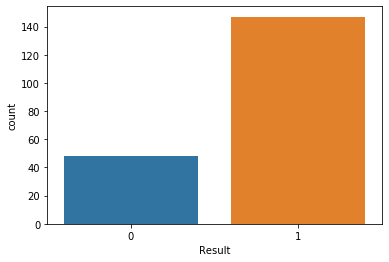

In [8]:
sns.countplot(dfx['Result'])
plt.show()

### The data set has 24% Minority class (non-Parkison patients).. hence it is NOT severaly imbalanced. 

In [9]:
"""
Function to calculate evaluation metrics: accuracy, recall, precision and f1 scores
"""

def metrics(actual, prediction):
    accuracy = accuracy_score(actual, prediction)
    recall = recall_score(actual, prediction)
    precision = precision_score(actual, prediction)
    f1score = f1_score(actual, prediction)
    print ('accuracy: {}, recall: {}, precision: {}, f1-score: {}'.format(accuracy, recall, precision, f1score))

### Baseline Model - Train and Test original dataset

Found a reference that suggested employing "stratified sampling" instead of a "random" train test split. 

Stratification splits the target proportionally between training and test set.

https://stats.stackexchange.com/questions/250273/benefits-of-stratified-vs-random-sampling-for-generating-training-data-in-classi

Stratified sampling aims at splitting a data set so that each split is similar with respect to something.

In a classification setting, it is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

As a result, if the data set has a large amount of each class, stratified sampling is pretty much the same as random sampling. But if one class isn't much represented in the data set, which may be the case in your dataset since you plan to oversample the minority class, then stratified sampling may yield a different target class distribution in the train and test sets than what random sampling may yield.

Note that the stratified sampling may also be designed to equally distribute some features in the next train and test sets. For example, if each sample represents one individual, and one feature is age, it is sometimes useful to have the same age distribution in both the train and test set.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(dfx.drop('Result', axis=1), dfx['Result'], test_size = 0.30, random_state=random_seed, stratify=dfx['Result'])
print ("TRAIN DATA SHAPE: ", x_train.shape)
print ("TEST DATA SHAPE: ", x_test.shape)
rf = RandomForestClassifier(n_estimators=50, random_state=random_seed)
rf.fit(x_train, y_train)

TRAIN DATA SHAPE:  (136, 22)
TEST DATA SHAPE:  (59, 22)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [11]:
pred = rf.predict(x_test)
metrics(y_test, pred)
print ('Classification report: {}'.format(classification_report(y_test, pred)))

accuracy: 0.864406779661017, recall: 0.8863636363636364, precision: 0.9285714285714286, f1-score: 0.9069767441860465
Classification report:               precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.93      0.89      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.87      0.86      0.87        59



### Over-sampling the minority class in training set using SMOTE

In [12]:
sm = SMOTE(random_state=random_seed)
X, Y = sm.fit_sample(x_train, y_train)
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (206, 22)
Shape of Y: (206,)


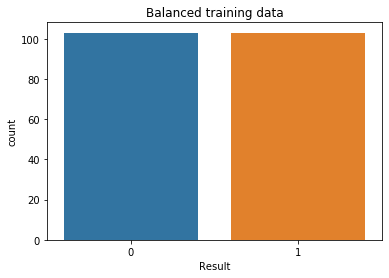

In [13]:
sns.countplot(Y)
plt.title('Balanced training data')
plt.show()

In [14]:
rf = RandomForestClassifier(n_estimators=50, random_state=random_seed).fit(X, Y)

pred_smote = rf.predict(x_test)

metrics(y_test, pred_smote)

print ('Classification report: {}'.format(classification_report(y_test, pred_smote)))

accuracy: 0.9152542372881356, recall: 0.9318181818181818, precision: 0.9534883720930233, f1-score: 0.942528735632184
Classification report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.95      0.93      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59



### Significant impact of SMOTE on all metrics

### Attempting Cross Validation 

In [15]:
### Data Leakage

"""
https://scikit-learn.org/stable/modules/cross_validation.html

When evaluating different settings (“hyperparameters”) for estimators, 
such as the C setting that must be manually set for an SVM (or the n_estimators setting for randomforestclassifier), 
there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator 
performs optimally. 

This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on 
generalization performance. 


https://machinelearningmastery.com/data-leakage-machine-learning/

Data leakage is when information from outside the training dataset is used to create the model. 
This additional information can allow the model to learn or know something that it otherwise would 
not know and in turn invalidate the estimated performance of the mode being constructed.

You may be creating overly optimistic models that are practically useless and cannot be used in production.

"""

### Overfitting

"""
Overfitting refers to the scenario when a machine learning model can’t generalise well on unseen data.

The clear sign of a machine learning overfitting is if its error on 
testing set is much greater than the error on training set.

High variance usually leads to greater likelihood of overfitting.

strategy against overfitting - cross validation.

"""


### Cross validation to mitigate Data Leakage & Overfitting

"""
To solve Data Leakage, another part of the dataset can be held out as a so-called “validation set”: 
training proceeds on the training set, after which evaluation is done on the validation set, 
and when the experiment seems to be successful, final evaluation can be done on the test set.

However, it is not always possible to partition the available data into three sets. By doing so,
we drastically reduce the number of samples which can be used for learning the model, 
and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). 
A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV.
"""


### How Cross Validation works

"""
In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are 
described below, but generally follow the same principles). 

For each of the k “folds”:

-  A model is trained using "k-1" of the "k" folds as training data;

- The resulting model is validated on the remaining part of the data 
(i.e., it is used as a test set to compute a performance measure such as accuracy).

- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

This approach can be computationally expensive, but does not waste too much data 
(as is the case when fixing an arbitrary validation set), 
which is a major advantage in problems where the number of samples is very small.

"""

'\nIn the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are \ndescribed below, but generally follow the same principles). \n\nFor each of the k “folds”:\n\n-  A model is trained using "k-1" of the "k" folds as training data;\n\n- The resulting model is validated on the remaining part of the data \n(i.e., it is used as a test set to compute a performance measure such as accuracy).\n\n- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. \n\nThis approach can be computationally expensive, but does not waste too much data \n(as is the case when fixing an arbitrary validation set), \nwhich is a major advantage in problems where the number of samples is very small.\n\n'

### Model training using k-fold cross validation

"cv" hyper-parameter enables 5 iterations of cross-validation

model rf is being trained to cross validate with a 5-fold split of training data 

Cross validation scores enables selection of different scoring metrics

In [16]:
rf = RandomForestClassifier(n_estimators=50, random_state=random_seed)
recall_scores = cross_val_score(rf, X, Y, scoring='recall', cv=10)
f1_scores = cross_val_score(rf, X,Y, scoring='f1', cv=10)
accuracy_scores = cross_val_score(rf, X,Y, scoring='accuracy', cv=10)
precision_scores = cross_val_score(rf, X,Y, scoring='precision', cv=10)
print ('Average Accuracy scores: {}'.format(np.mean(accuracy_scores)))
print ('Average Recall score: {}'.format(np.mean(recall_scores)))
print ('Average Precision scores: {}'.format(np.mean(precision_scores)))
print ('Average F1 scores: {}'.format(np.mean(f1_scores)))

Average Accuracy scores: 0.9423809523809522
Average Recall score: 0.9036363636363637
Average Precision scores: 0.978409090909091
Average F1 scores: 0.9372263993316624


### Use above model to predict performance on Training data

The reason is to generate a baseline performance target against which test data can be compared for overfitting

In [17]:
preds = cross_val_predict(rf, X, Y, cv=50)
print ('Accuracy score: {}'.format(accuracy_score(Y, preds)))
print ('Recall score: {}'.format(recall_score(Y, preds)))
print ('Precision score: {}'.format(precision_score(Y, preds)))
print ('f1-score: {}'.format(f1_score(Y, preds)))

Accuracy score: 0.941747572815534
Recall score: 0.8932038834951457
Precision score: 0.989247311827957
f1-score: 0.9387755102040817


### Use above model to predict performance on Test data

In [18]:
rf = RandomForestClassifier(n_estimators=50, random_state=random_seed).fit(X, Y)
test_preds = rf.predict(x_test)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print ('Classification report: {}'.format(classification_report(y_test, test_preds)))

Accuracy score: 0.9152542372881356
Recall score: 0.9318181818181818
Precision score: 0.9534883720930233
f1-score: 0.942528735632184
Classification report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.95      0.93      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59



### Comparative scores  of training vs test data:

Accuracy - dropped; Recall - improved; Precision - dropped; f1-score - improved 

I think there is some overfitting, but not significant as the f1 &  recall scores have improved

Results summarized in "Homework - Results"

In [19]:
### To do next:

"""
    1. Try out ADASYN or other minority oversampling techniques than SMOTE

    2. Perform minority under-sampling to create a truly imbalanced dataset and observe impact of SMOTE & CV
    
"""

'\n    1. Try out ADASYN or other minority oversampling techniques than SMOTE\n\n    2. Perform minority under-sampling to create a truly imbalanced dataset and observe impact of SMOTE & CV\n    \n'

### 1. Over-sampling the minority class in training set using ADASYN

In [20]:
ad = ADASYN(random_state=random_seed)
X, Y = ad.fit_sample(x_train, y_train)
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (211, 22)
Shape of Y: (211,)


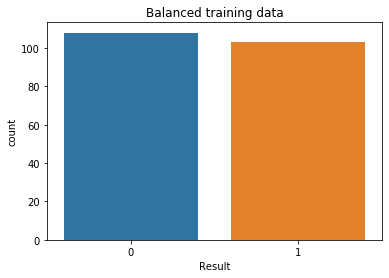

In [21]:
sns.countplot(Y)
plt.title('Balanced training data')
plt.show()

In [22]:
rf = RandomForestClassifier(n_estimators=50, random_state=random_seed).fit(X, Y)

pred_adasyn = rf.predict(x_test)

metrics(y_test, pred_adasyn)

accuracy: 0.864406779661017, recall: 0.8409090909090909, precision: 0.9736842105263158, f1-score: 0.9024390243902439


In [23]:
rf = RandomForestClassifier(n_estimators=50, random_state=random_seed)
recall_scores = cross_val_score(rf, X, Y, scoring='recall', cv=10)
f1_scores = cross_val_score(rf, X,Y, scoring='f1', cv=10)
accuracy_scores = cross_val_score(rf, X,Y, scoring='accuracy', cv=10)
precision_scores = cross_val_score(rf, X,Y, scoring='precision', cv=10)
print ('Average Accuracy scores: {}'.format(np.mean(accuracy_scores)))
print ('Average Recall score: {}'.format(np.mean(recall_scores)))
print ('Average Precision scores: {}'.format(np.mean(precision_scores)))
print ('Average F1 scores: {}'.format(np.mean(f1_scores)))

Average Accuracy scores: 0.91991341991342
Average Recall score: 0.8745454545454544
Average Precision scores: 0.9627272727272727
Average F1 scores: 0.9123057644110275


In [24]:
preds = cross_val_predict(rf, X, Y, cv=10)
print ('Accuracy score: {}'.format(accuracy_score(Y, preds)))
print ('Recall score: {}'.format(recall_score(Y, preds)))
print ('Precision score: {}'.format(precision_score(Y, preds)))
print ('f1-score: {}'.format(f1_score(Y, preds)))

Accuracy score: 0.919431279620853
Recall score: 0.8737864077669902
Precision score: 0.9574468085106383
f1-score: 0.9137055837563451


In [25]:
rf = RandomForestClassifier(n_estimators=50, random_state=random_seed).fit(X, Y)
test_preds = rf.predict(x_test)
print ('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print ('Recall score: {}'.format(recall_score(y_test, test_preds)))
print ('Precision score: {}'.format(precision_score(y_test, test_preds)))
print ('f1-score: {}'.format(f1_score(y_test, test_preds)))
print ('Classification report: {}'.format(classification_report(y_test, test_preds)))

Accuracy score: 0.864406779661017
Recall score: 0.8409090909090909
Precision score: 0.9736842105263158
f1-score: 0.9024390243902439
Classification report:               precision    recall  f1-score   support

           0       0.67      0.93      0.78        15
           1       0.97      0.84      0.90        44

    accuracy                           0.86        59
   macro avg       0.82      0.89      0.84        59
weighted avg       0.90      0.86      0.87        59



### Conclusion: ADASYN gave worse performance than SMOTE for the same challenge

There is overfitting in the model despite cross validation..

### 2. Intentional imbalanced data set generation and seeing effect of SMOTE

In [26]:
df2 = dfx.copy()
df2

,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,Result,RPDE,DFA,Spread1,Spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [27]:
df2['Result'].value_counts()

1    147
0     48
Name: Result, dtype: int64

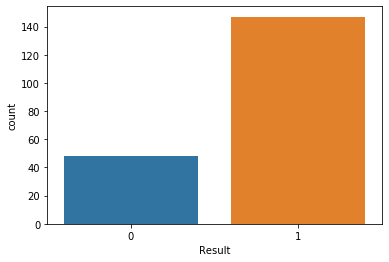

In [28]:
sns.countplot(df2['Result'])
plt.show()

In [29]:
#Separate Results into two dataframes
data_a = df2[df2['Result'] == 1]
data_b = df2[df2['Result'] == 0]
print (data_a.shape)
print (data_b.shape)

(147, 23)
(48, 23)


In [30]:
# sampling from negative results and appending to overall results
random.seed(0)
data_b_sample = data_b.sample(15, replace=False)
dfY = pd.concat([data_a, data_b_sample])
print (dfY.shape)

(162, 23)


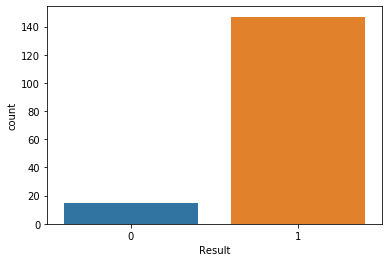

In [31]:
sns.countplot(dfY['Result'])
plt.show()

### Baseline Model - Train and test without additional pre-processing

In [32]:
x2_train, x2_test, y2_train, y2_test = train_test_split(dfY.drop('Result', axis=1), dfY['Result'], test_size = 0.30, random_state=random_seed, stratify=dfY['Result'])
print ("TRAIN DATA SHAPE: ", x2_train.shape)
print ("TEST DATA SHAPE: ", x2_test.shape)
rf2 = RandomForestClassifier(n_estimators=50, random_state=random_seed)
rf2.fit(x2_train, y2_train)

TRAIN DATA SHAPE:  (113, 22)
TEST DATA SHAPE:  (49, 22)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
preds = rf2.predict(x2_test)
metrics(y2_test, preds)

accuracy: 0.8979591836734694, recall: 0.9772727272727273, precision: 0.9148936170212766, f1-score: 0.945054945054945


In [34]:
sm = SMOTE(random_state=random_seed)
X2, Y2 = sm.fit_sample(x2_train, y2_train, )
print ('Shape of oversampled data: {}'.format(X2.shape))
print ('Shape of Y: {}'.format(Y2.shape))

Shape of oversampled data: (206, 22)
Shape of Y: (206,)


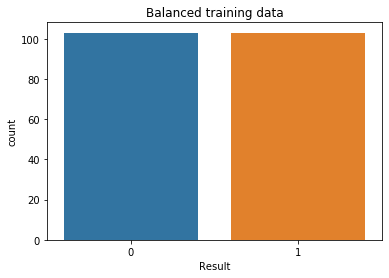

In [35]:
sns.countplot(Y2)
plt.title('Balanced training data')
plt.show()

In [36]:
rf2 = RandomForestClassifier(n_estimators=50, random_state=random_seed).fit(X2, Y2)

pred_smote = rf2.predict(x2_test)

metrics(y2_test, pred_smote)

accuracy: 0.8571428571428571, recall: 0.9090909090909091, precision: 0.9302325581395349, f1-score: 0.9195402298850575


In [37]:
rf2 = RandomForestClassifier(n_estimators=50, random_state=random_seed)
recall_scores = cross_val_score(rf2, X2, Y2, scoring='recall', cv=10)
f1_scores = cross_val_score(rf2, X2,Y2, scoring='f1', cv=10)
accuracy_scores = cross_val_score(rf2, X2,Y2, scoring='accuracy', cv=10)
precision_scores = cross_val_score(rf2, X2,Y2, scoring='precision', cv=10)
print ('Average Accuracy scores: {}'.format(np.mean(accuracy_scores)))
print ('Average Recall score: {}'.format(np.mean(recall_scores)))
print ('Average Precision scores: {}'.format(np.mean(precision_scores)))
print ('Average F1 scores: {}'.format(np.mean(f1_scores)))

Average Accuracy scores: 0.9704761904761904
Average Recall score: 0.9609090909090909
Average Precision scores: 0.9818181818181818
Average F1 scores: 0.9703577124629756


In [38]:
preds = cross_val_predict(rf2, X2, Y2, cv=10)
print ('Accuracy score: {}'.format(accuracy_score(Y2, preds)))
print ('Recall score: {}'.format(recall_score(Y2, preds)))
print ('Precision score: {}'.format(precision_score(Y2, preds)))
print ('f1-score: {}'.format(f1_score(Y2, preds)))

Accuracy score: 0.970873786407767
Recall score: 0.9611650485436893
Precision score: 0.9801980198019802
f1-score: 0.9705882352941178


In [39]:
rf2 = RandomForestClassifier(n_estimators=50, random_state=random_seed)
rf2.fit(X2, Y2)
test_preds2 = rf2.predict(x2_test)
print ('Accuracy score: {}'.format(accuracy_score(y2_test, test_preds2)))
print ('Recall score: {}'.format(recall_score(y2_test, test_preds2)))
print ('Precision score: {}'.format(precision_score(y2_test, test_preds2)))
print ('f1-score: {}'.format(f1_score(y2_test, test_preds2)))

Accuracy score: 0.8571428571428571
Recall score: 0.9090909090909091
Precision score: 0.9302325581395349
f1-score: 0.9195402298850575


In [ ]:
print ('Classification report: {}'.format(classification_report(y2_test, test_preds2)))

In [ ]:
### Accuracy drops substantially once test set is introduced